<h1 align='center'> Optimization </h1>

<h2> Introduction </h2>

From a mathematical perspective, an optimization consists on finding where a function gets its maximum or its minimum value. In practice this is very important since in many cases we would like to minimize a certain value, for example the costs of doing a certain tasks; or we want to maximize certain values, like the reward we obtain from a given task. And most algorithms in data science are built on this kind of optimization problems, as we will eventually see.

If we which to find an $x^{*}$ such that it minimizes $f(x)$, we write in mathematical notation:

$$x^{*} = \arg\min_{x} f(x)$$

Conversely for the maximization problem:

$$x^{*} = \arg\max_{x} f(x)$$

Before moving forward, let's define two types of optima: local and global for a function $f(x)$ where $x$ takes values over the set $S$:

- Global optimum: $x^{*}$ is said to globally optimize the function $f(x)$ if there is no other vector $\hat{x} \in S$ such that $f({\hat{x}}) > f(x^{*})$
- Local optimum:  $x^{*}$ is said to locally optimize the function $f(x)$ if there is no other vector $\hat{x} \in C$ such that $f({\hat{x}}) > f(x^{*})$ where $x^{*}, \hat{x} \in C$.

<h2> Using differentiation to optimize </h2>

Let's analyse the following function and where it gets their local maximum and local minimum value:

In [3]:
import matplotlib.pyplot as plt
import numpy as np

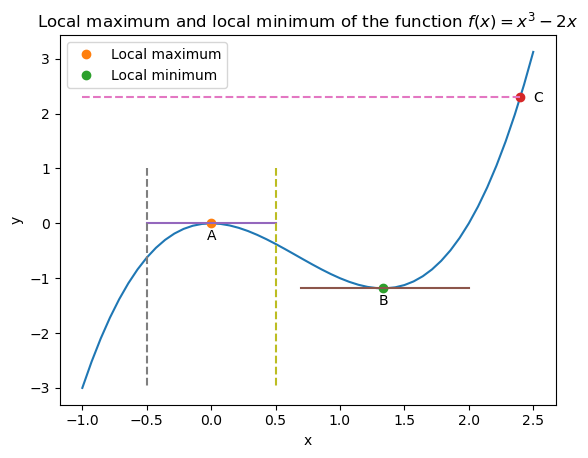

In [36]:
x = np.linspace(-1, 2.5)
y = x**3 - 2*x**2

plt.plot(x,y)

plt.plot(0, 0, 'o',label='Local maximum')
plt.plot(4/3, -1.1851851851851856, 'o', label='Local minimum')
plt.plot(2.4, 2.4**3 - 2*2.4**2, 'o')

plt.plot([-0.5, 0.5], [0,0])
plt.plot([0.7, 2], [-1.1851851851851856, -1.1851851851851856])
plt.plot([-1, 2.4], [2.4**3 - 2*2.4**2, 2.4**3 - 2*2.4**2], '--')
plt.plot([-0.5, -0.5], [1, -3], '--')
plt.plot([0.5, 0.5], [1, -3], '--')

plt.annotate('A', xy=(-0.03,-0.3))
plt.annotate('B', xy=(4/3-0.03, -1.1851851851851856 - 0.3))
plt.annotate('C', xy=(2.4+0.1, 2.4**3 - 2*2.4**2 - 0.1))

plt.legend()

plt.title('Local maximum and local minimum of the function $f(x) = x^3 - 2x$')

plt.xlabel('x')
plt.ylabel('y')
plt.show()

From these graph we can see that point $A$ is a local maximum because there is other points, such as $c$, that are higher than $A$. However, it is still a maximum because there exists a susbset where we could find no other value of $x$ that reaches a higher value than $A$ (see the subset defined by the two vertical dashed lines in the graph). A similar assertion can be made with point $B$, in the minimization problem.

From this plot we can see that local maxima and minima are found where tangent lines have slope 0, this means $\frac{df(x)}{dx} = 0$, and this is something that holds both for local and global optima.

<h2> Several variables optima </h2>

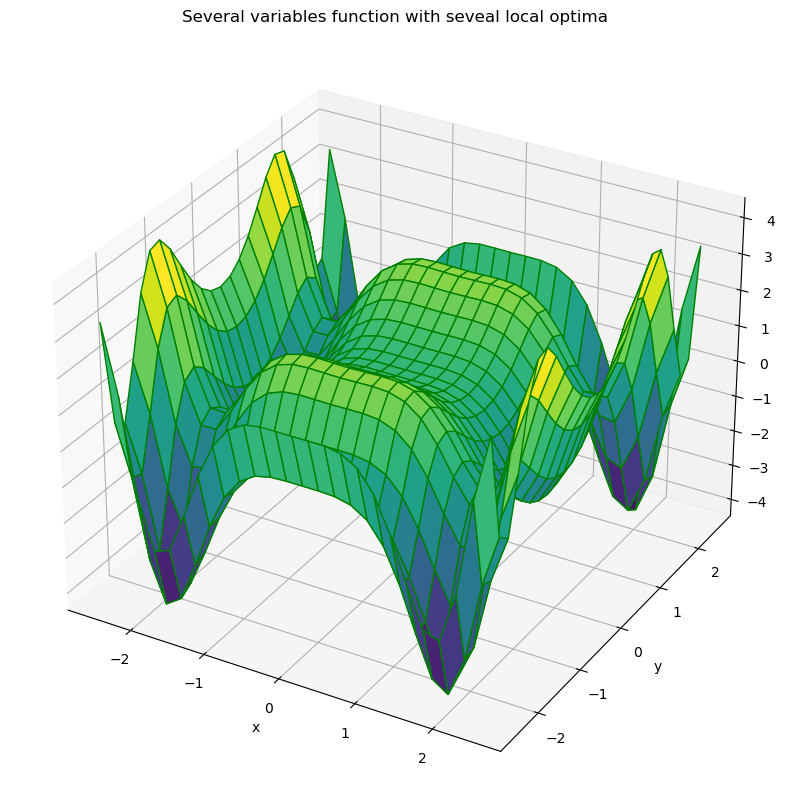

In [9]:
import numpy as np
import matplotlib.pyplot as plt
 
# define la función 
x = np.outer(np.linspace(-2.5, 2.5, 25), np.ones(25))
y = x.copy().T
z = np.exp((x**2 + y**2)/10)*(np.cos(x ** 2 ) + np.sin(y ** 2))
 
fig = plt.figure(figsize=(10,10))
 
# plot 3D
ax = plt.axes(projection ='3d')
 
# syntax for plotting
ax.plot_surface(x, y, z, cmap ='viridis', edgecolor ='green')
ax.set_title('Several variables function with seveal local optima')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

The case of several variables is similar to the single variable case, except that we need to find all the partial derivates with respect to all variables and set them to zero. This is, let $\mathbf{x} = (x_{1}, x_{2}, ... , x_{n})$ a $R^{n}$ vector, and $f(\mathbf{x})$ a function of that vector. Then we define the gradient vector as:

$$\nabla f(\mathbf{x}) = \left(\frac{\partial f(x)}{\partial x_{1}}, \frac{\partial f(\mathbf{x})}{\partial x_{2}}, ..., \frac{\partial f(\mathbf{x})}{\partial x_{n}} \right)$$

where $\nabla$ is pronounced "nabla", and represents the vector of all the partial derivatives of $f(\mathbf{x})$. So, $f(\mathbf{x})$ finds an optimum at $x_{0}$ iff $\nabla f(x_{0}) = \mathbf{0}$, where $\mathbf{0} = (0, 0, ... , 0)$ is the null vector in $R^{n}$.

<h2> Second order conditions </h2>

So far we have insepected how to find candidates of optima, note that by solving for $x_{0}$ in $\nabla f(\mathbf{x_{0}}) = \mathbf{0}$ we will not know whether $\mathbf{x_{0}}$ solves the maximization or minimization problem. This is why we need an additional tool to determine the type of optimum we have found. Here is when second order derivatives comes into play.

By computing the second order derivatives we can build the Hessian matrix $H(\mathbf{x})$ which entry $h_{ij}$ is $\frac{\partial ^{2}f(\mathbf{x})}{\partial x_{i} \partial x_{j}}$:

$$H(\mathbf{x}) = \begin{bmatrix}
\frac{\partial ^2 f(\mathbf{x})}{\partial x_{1}x_{1}} & \frac{\partial ^2 f(\mathbf{x})}{\partial x_{1}x_{2}} & \ldots & \frac{\partial ^2 f(\mathbf{x})}{\partial x_{1}x_{n}}\\ 
\frac{\partial ^2 f(\mathbf{x})}{\partial x_{2}x_{1}} & \frac{\partial ^2 f(\mathbf{x})}{\partial x_{2}x_{2}} & \ldots & \frac{\partial ^2 f(\mathbf{x})}{\partial x_{2}x_{n}} \\
\vdots & \vdots & \ddots  & \vdots \\
\frac{\partial ^2 f(\mathbf{x})}{\partial x_{n}x_{1}} & \frac{\partial ^2 f(\mathbf{x})}{\partial x_{n}x_{2}} & \ldots & \frac{\partial ^2 f(\mathbf{x})}{\partial x_{n}x_{n}}
\end{bmatrix}$$

There is an important theorem called the Young Theorem that states that if $f(\mathbf{x})$ is continous derivable function, the Hessian matrix, $H(\mathbf{x})$ is a symmetric matrix, this is, $\frac{\partial^2 f(\mathbf{x})}{\partial x_{i} x_{j}} = \frac{\partial^2 f(\mathbf{x})}{\partial x_{j} x_{i}}$ for all $j$ and $i$.

Now, let's define the conditions under which $\mathbf{x_{0}}$ is a maximum or a minimum:

$$\mathbf{x_{0}} \text{ is a minimum iff } \mathbf{x_{0}}^{T}H(\mathbf{x_{0}})\mathbf{x_{0}} \geq 0$$
$$\mathbf{x_{0}} \text{ is a maximum iff } \mathbf{x_{0}}^{T}H(\mathbf{x_{0}})\mathbf{x_{0}} \leq 0$$

These two are the conditions that define whether a several variables function is convex or concave, respectively.

<h2> Modern optimization techniques: Gradient Descent </h2>

So far we have inspected the theoretical foundations of optimization and the conditions that must be met in order to solve an optimization problem. However, from a computing perspective matrix algebra is often costly, so most algorithms are based solely on the gradient. In this section we will revise the most common optimization algorithms that are used in Machine Learning.

Since most optimization tasks in data science are minimization problems, I will consider this type of optimization scenarios in all the following examples. Before diving in, consider the minimization of the function $f(x) = x^2$, which solution is $(0,0)$:

In [55]:
from IPython.display import Image, display, HTML
HTML('<img src="img/plot1.gif" />', )

Note that the global minimum is find by an iterative process in which we calculate the derivative at a random initial point and then we start jumping until the slope of the tangent line is close enough to zero. In this example, the process lasted 29 iterations, but this need not be the case, we could have had more iterations or less iterations depending on the complexity of the problem.

We will now dive in into a family of a generic optimization algorithm called "Gradient Descent".

The general idea of this algorithm is what we saw in the previous animation, it computes the local gradient at a random point and then start going in the direction of descending gradient. Once the gradient is zero, the algorithm stops. It is important to take into account some considerations, first we need to set a random initialization for the algorithm, how far should we jump from one step to the next, called the learning rate, and how many iterations are we willing to make. All of these parameters are chosen by the programmer, but most optimization algorithm already have some default values for each one of them.

The way this algorithm works is based on the following procedure:

$$x^{(t + 1)} = x^{(t)} - \eta _{t} \nabla f(x^{(t)})$$ 

where $t$ is the current iteration and $\eta_{t}$ is the learning rate at iteration $t$, which represents how far we shall jump to find the next value of $x$. What we are doing here is to update the value of $x$ by using the gradient at each iteration. Also note that we need to be updating $\eta$ after each step in order to ensure that we are in fact getting closing to the minimum instead of going away from it.

To fully understand the intuition behind this algorithm, [Aurélien Gerón](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646/ref=sr_1_1?crid=34O6WQDIOZ0Y7&keywords=hands+on+machine+learning+with+scikit-learn+and+tensorflow+2&qid=1676397379&sprefix=hands+on+machine+learning+with+scikit-learn+and+tensorflow+%2Caps%2C149&sr=8-1) describes the proces with the following analogy:

    "Suppose you are lost in the mountains in a dense fog, and you can only feel the slope of the ground below your feet. A good strategy to get to the bottom of the valley quickly is to go downhill in the direction of the steepest slope. This is exactly what Gradient Descent does: it measures the local gradient [...] and it goes in the direction of the descending gradient. Onced the gradient is zero, you have reached a minimum!"
    
Now let's examine how the choosing of the hyperparameters affects the performance of the algorithm. If we choose a too low learning the steps from one point to the next will be too short and optimization might take for ever to finish. See the following animation:

In [56]:
HTML('<img src="img/plot2.gif" />')

As we see, the approaching to the optimim is too slow, and it takes 220 iterations to end.

On the other hand, if we choose a too large learning rate the iterations might start jumping around the optimum without ever finiding, at the risk of getting into an infinite loop, just as shown in the next animation:

In [57]:
HTML('<img src="img/plot3.gif" />')

Although we have examined functions of a single variables in all the previous animations, the several variables problem works the same way, as shown in the following animation:

In [58]:
HTML('<img src="img/Gradient_descent.gif" />')

Source: [Jacopo Bertolotti](https://commons.wikimedia.org/wiki/File:Gradient_descent.gif), CC0, via Wikimedia Commons

<h2> Practical example </h2>

Let's see how we would program a gradient descent algorithm to minimize the function:

$$f(x_{1}, x_{2}) = (2x_{1} + 2x_{2} - 5)^2$$

with gradient $\nabla f(x_{1}, x_{2}) = \left(8x_{1} + 8x_{2} - 20,  8x_{1} + 8x_{2} - 20\right)$ and global minimum at $\left(0, \frac{5}{2} \right)$.

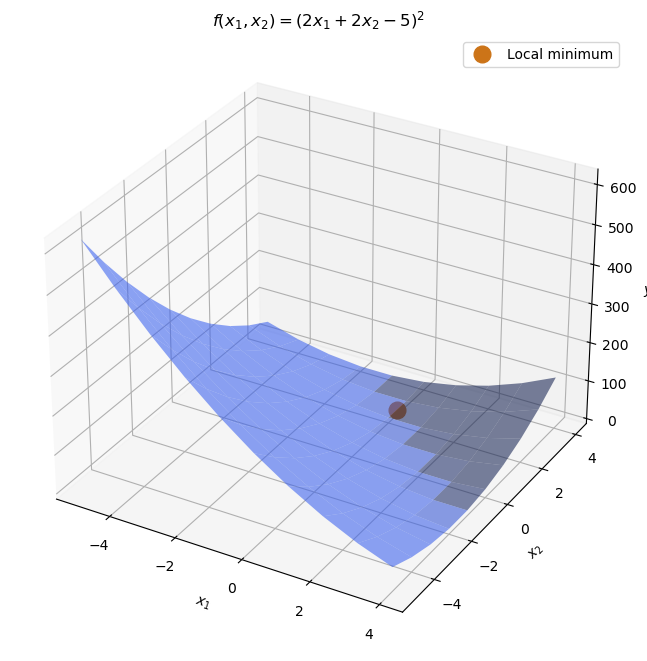

In [126]:
ax = plt.figure(figsize=(8, 8)).add_subplot(projection='3d')

X, Y = np.mgrid[-5:5, -5:5]
Z = (2*X + 2*Y - 5)**2

ax.plot_surface(X, Y, Z, color='#365FF48F')

plt.title('$f(x_{1}, x_{2}) = (2x_{1} + 2x_{2} - 5)^2$')

ax.set_xlabel('$x_{1}$')
ax.set_ylabel('$x_{2}$')
ax.set_zlabel('$y$')

ax.plot(0, 5/2, (2*(5/2) - 5)**2, 'o', label='Local minimum', color='#CC7418FF', markersize=12)

plt.legend()
plt.show()

In [1]:
def fx(x1, x2):
    return (2*x1 + 2*x2 - 5)**2

def fprime(x1, x2):
    return 8*x1 + 8*x2 - 20

def gradient_descent(function, derivative, start, iterations = 1000, lr = 0.1, precision = 0.001):
    
    px = np.array([start[0], start[1]]) # Starting x coordinate

    for frame in range(iterations):
        old_px = px # Saving old px value to calculate step

        # Plot point to track
        py = function(px[0], px[1]) # Y coordinate of point    

        # Plot tangent line to the graph at (px, py) point
        slope = derivative(px[0], px[1])

        # Calculate new value of px
        px = px - lr * slope
        step = abs(old_px - px)
        
        # Stopping algorithm if desired precision have been met
        if px[0] <= precision and px[1] <= precision:
            print(px[0] <= precision and px[1] <= precision)

In [5]:
result = gradient_descent(fx, fprime, start=[2,2])

In [7]:
type(result)

NoneType

<h2> References </h2>

- https://github.com/AprendizajeProfundo/diplomado-ciencia-de-datos/blob/main/Matematicas-Estadistica/Cuadernos/optimizacion_sgd.ipynb
- https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646/ref=sr_1_1?crid=34O6WQDIOZ0Y7&keywords=hands+on+machine+learning+with+scikit-learn+and+tensorflow+2&qid=1676397379&sprefix=hands+on+machine+learning+with+scikit-learn+and+tensorflow+%2Caps%2C149&sr=8-1
- https://commons.wikimedia.org/wiki/File:Gradient_descent.gif